In [1]:
import modification_rules as mr
import ripp_design as rd
import numpy as np

/home/eglassey/.local/lib/python3.7/site-packages/Bio/SubsMat/__init__.py:131: BiopythonDeprecationWarning: Bio.SubsMat has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.substitution_matrices as a replacement, and contact the Biopython developers if you still need the Bio.SubsMat module.
  BiopythonDeprecationWarning,


In [2]:
%matplotlib inline

# This is the modifications specified, where the numbering at the first position is 0
## LynD (thiazolination) at position 1 of the core
## PlpXY (tyarmine excision) at position 5 of the core
## ThcoK (phosphorylation) at position 12 of the core
## TEVp cleavage at the beginning (position 0) of the core

In [3]:
#indexing of the peptide starts at 0
modifications = (('lynd', (1,)), ('plpxy', (5,)), ('thcok', (12,)), ('tevp', (0,)))

## First, generate a dataframe of all combinations of enzyme recognition site spacings that are possible, then plot their scores vs leader length

In [4]:
leaders = rd.hybrid_leader(*modifications, core_length=13)

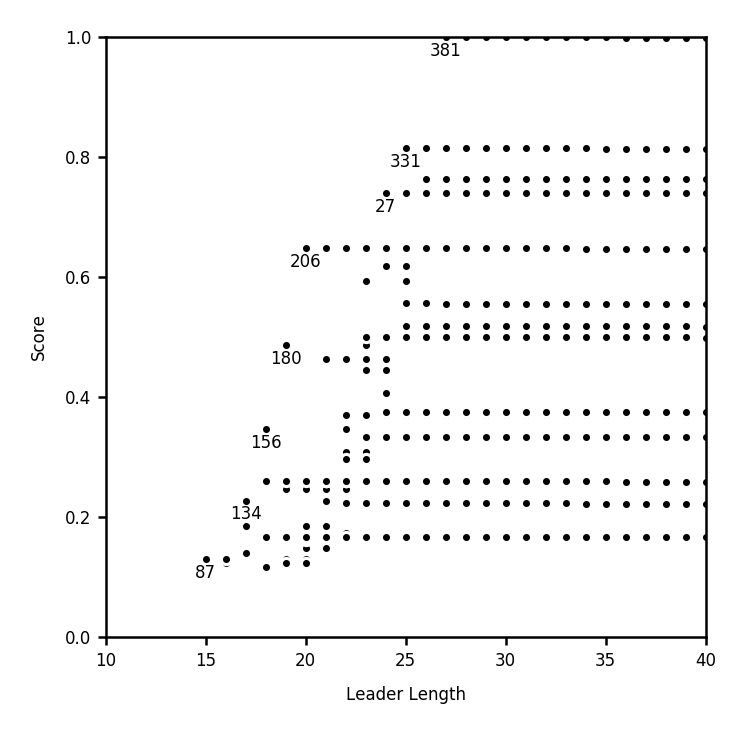

In [5]:
rd.plot_choose_leader(leaders)

## We chose number 206 along the boundary, which was significantly shorter without too much of a loss in score
## Pull out number 206, filling any gaps with random amino acids and prioritizing PlpXY and then LynD sequence constraints

In [6]:
leader = rd.build_leader(rd.plot_choose_leader(leaders, ind=206),
                         fill='random', prioritize=['plpxy', 'lynd'])

In [7]:
leader

'LAELNEEELEAIAGENLYFQ'

## Generate a core motif that combines the constraints of all modifying enzymes

In [8]:
core = rd.hybrid_core_motif(*modifications, core_length=13)

In [9]:
core

[{'A', 'T'},
 {'C'},
 {'A', 'S'},
 {'A'},
 {'L', 'M', 'N'},
 {'Y'},
 {'G'},
 {'A', 'S', 'T', 'V'},
 {'V'},
 {'E', 'F', 'I', 'K', 'P', 'T'},
 {'P'},
 {'A', 'W', 'Y'},
 {'S'}]

In [10]:
#This is the number of unique sequences in the motif
np.product([len(i) for i in core])

864

## enumerate all the individual library members encoded by the motif

In [11]:
allcores = rd.enumerate_cores(core)    

## combine with the leader to get all peptides that are modifiable by the requested set of modifying enzymes at the requested positions

In [12]:
allpeptides = rd.build_precursor_peptides(leader, allcores)

In [13]:
print(allpeptides)

['LAELNEEELEAIAGENLYFQACSAMYGAVFPWS', 'LAELNEEELEAIAGENLYFQACSAMYGAVFPYS', 'LAELNEEELEAIAGENLYFQACSAMYGAVFPAS', 'LAELNEEELEAIAGENLYFQACSAMYGAVEPWS', 'LAELNEEELEAIAGENLYFQACSAMYGAVEPYS', 'LAELNEEELEAIAGENLYFQACSAMYGAVEPAS', 'LAELNEEELEAIAGENLYFQACSAMYGAVKPWS', 'LAELNEEELEAIAGENLYFQACSAMYGAVKPYS', 'LAELNEEELEAIAGENLYFQACSAMYGAVKPAS', 'LAELNEEELEAIAGENLYFQACSAMYGAVTPWS', 'LAELNEEELEAIAGENLYFQACSAMYGAVTPYS', 'LAELNEEELEAIAGENLYFQACSAMYGAVTPAS', 'LAELNEEELEAIAGENLYFQACSAMYGAVPPWS', 'LAELNEEELEAIAGENLYFQACSAMYGAVPPYS', 'LAELNEEELEAIAGENLYFQACSAMYGAVPPAS', 'LAELNEEELEAIAGENLYFQACSAMYGAVIPWS', 'LAELNEEELEAIAGENLYFQACSAMYGAVIPYS', 'LAELNEEELEAIAGENLYFQACSAMYGAVIPAS', 'LAELNEEELEAIAGENLYFQACSAMYGSVFPWS', 'LAELNEEELEAIAGENLYFQACSAMYGSVFPYS', 'LAELNEEELEAIAGENLYFQACSAMYGSVFPAS', 'LAELNEEELEAIAGENLYFQACSAMYGSVEPWS', 'LAELNEEELEAIAGENLYFQACSAMYGSVEPYS', 'LAELNEEELEAIAGENLYFQACSAMYGSVEPAS', 'LAELNEEELEAIAGENLYFQACSAMYGSVKPWS', 'LAELNEEELEAIAGENLYFQACSAMYGSVKPYS', 'LAELNEEELEAIAGENLYFQACSAMYGSVKPAS', 